# Week 3 Project: End-to-End Insurance Risk Analytics & Predictive Modeling

## Task 1

### 1. Import libraries

In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### 2. Extracting the zip file for the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Step 2: Unzip the file
import zipfile

zip_path = '/content/drive/MyDrive/kaim 6/week3/MachineLearningRating_v3.zip'
extract_path = '/content/extracted'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [4]:
# prompt: open .txt file

file_path = '/content/extracted/MachineLearningRating_v3.txt'

with open(file_path, 'r') as file:
    txt = file.read()


In [5]:
txt[:4000]

'UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bodytype|NumberOfDoors|VehicleIntroDate|CustomValueEstimate|AlarmImmobiliser|TrackingDevice|CapitalOutstanding|NewVehicle|WrittenOff|Rebuilt|Converted|CrossBorder|NumberOfVehiclesInFleet|SumInsured|TermFrequency|CalculatedPremiumPerTerm|ExcessSelected|CoverCategory|CoverType|CoverGroup|Section|Product|StatutoryClass|StatutoryRiskType|TotalPremium|TotalClaims\n145249|12827|2015-03-01 00:00:00|True|  |Close Corporation|Mr|English|First National Bank|Current account|Not specified|Not specified|South Africa|Gauteng|1459|Rand East|Rand East|Mobility - Motor|44069150|Passenger Vehicle|2004|MERCEDES-BENZ|E 240|6|2597|130|S/D|4|6/2002|119300|Yes|No|119300|More than 6 months||||||0.01|Monthly|25|Mobility - Windscre

In [6]:
# Changing the text into csv

# inside the sample text each column is separated using a "|" and each raw datas are written in new line (\n).
delimiter = '|'

# Split the text into lines
lines = txt.splitlines()

# Define the path for the output CSV file
csv_output_path = '/content/extracted/MachineLearningRating_v3.csv'

# Write the lines to a CSV file
with open(csv_output_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile, delimiter=delimiter)
    for line in lines:
        row_data = line.split(delimiter) # Simple split based on the assumed delimiter
        csv_writer.writerow(row_data)

print(f"Converted {file_path} to CSV and saved at {csv_output_path}")

Converted /content/extracted/MachineLearningRating_v3.txt to CSV and saved at /content/extracted/MachineLearningRating_v3.csv


In [7]:
# You can optionally verify the content of the created CSV
# import pandas as pd
df = pd.read_csv(csv_output_path, delimiter=delimiter) # Use the same delimiter when reading
print("\nContent of the newly created CSV:")

<ipython-input-7-3139070165>:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_output_path, delimiter=delimiter) # Use the same delimiter when reading



Content of the newly created CSV:


### 3. Data Summarization

In [8]:
# Visualize the first few rows of the DataFrame
print(df.head())

   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

In [9]:
# Get summary statistics
print(df.describe())

       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.000000       0.0

In [10]:
# Get info about the DataFrame (data types, non-null counts)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [11]:
# Calculate variability (standard deviation) for key numerical features
print("\n--- Variability (Standard Deviation) of Key Financial Features ---")
print(df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'CalculatedPremiumPerTerm']].std().to_string())


--- Variability (Standard Deviation) of Key Financial Features ---
TotalPremium                   230.284513
TotalClaims                   2384.074695
CustomValueEstimate         564515.749848
CalculatedPremiumPerTerm       399.701721


### Data Quality Assessment

In [12]:
# Check for missing values
print("\n--- Missing Values Count (df.isnull().sum()) ---")
print(df.isnull().sum())


--- Missing Values Count (df.isnull().sum()) ---
UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype      

### Univariate Analysis

In [13]:
df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"], errors='coerce')

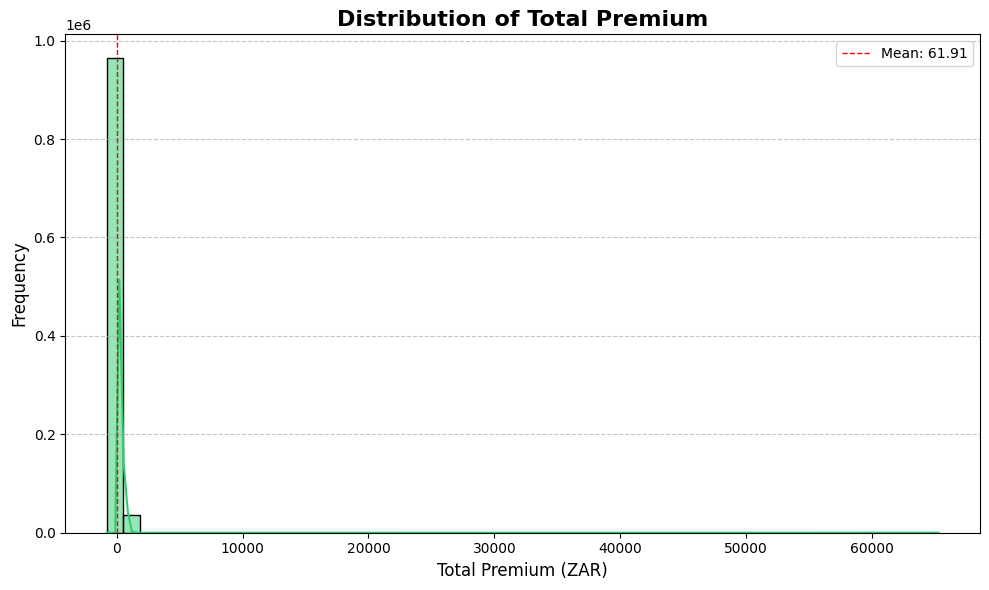

In [14]:
# Distribution of TotalPremium
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPremium'], bins=50, kde=True, color='#2ecc71', edgecolor='black')
plt.title('Distribution of Total Premium', fontsize=16, fontweight='bold')
plt.xlabel('Total Premium (ZAR)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75, linestyle='--')
plt.axvline(df['TotalPremium'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {df["TotalPremium"].mean():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

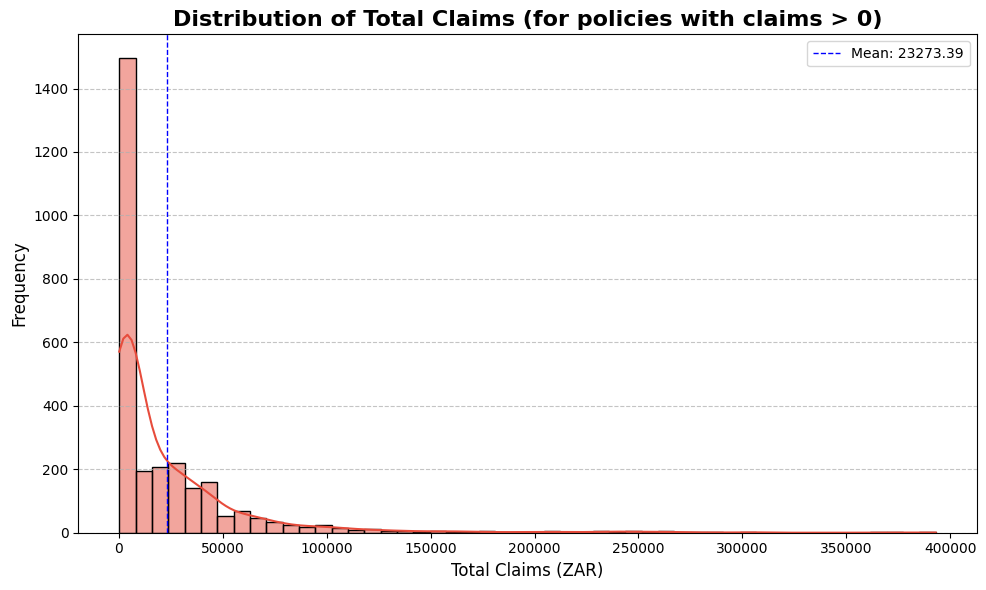

In [15]:
# Distribution of TotalClaims (focus on claims > 0 for severity understanding)
plt.figure(figsize=(10, 6))
sns.histplot(df[df['TotalClaims'] > 0]['TotalClaims'], bins=50, kde=True, color='#e74c3c', edgecolor='black')
plt.title('Distribution of Total Claims (for policies with claims > 0)', fontsize=16, fontweight='bold')
plt.xlabel('Total Claims (ZAR)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75, linestyle='--')
plt.axvline(df[df['TotalClaims'] > 0]['TotalClaims'].mean(), color='blue', linestyle='dashed', linewidth=1, label=f'Mean: {df[df["TotalClaims"] > 0]["TotalClaims"].mean():.2f}')
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

<ipython-input-17-422724682>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, ax=axes[i], palette='viridis')
<ipython-input-17-422724682>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, ax=axes[i], palette='viridis')
<ipython-input-17-422724682>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, ax=axes[i], palette='viridis')
<ipython-input-17-422724682>:7: FutureWarning: 

Passing `

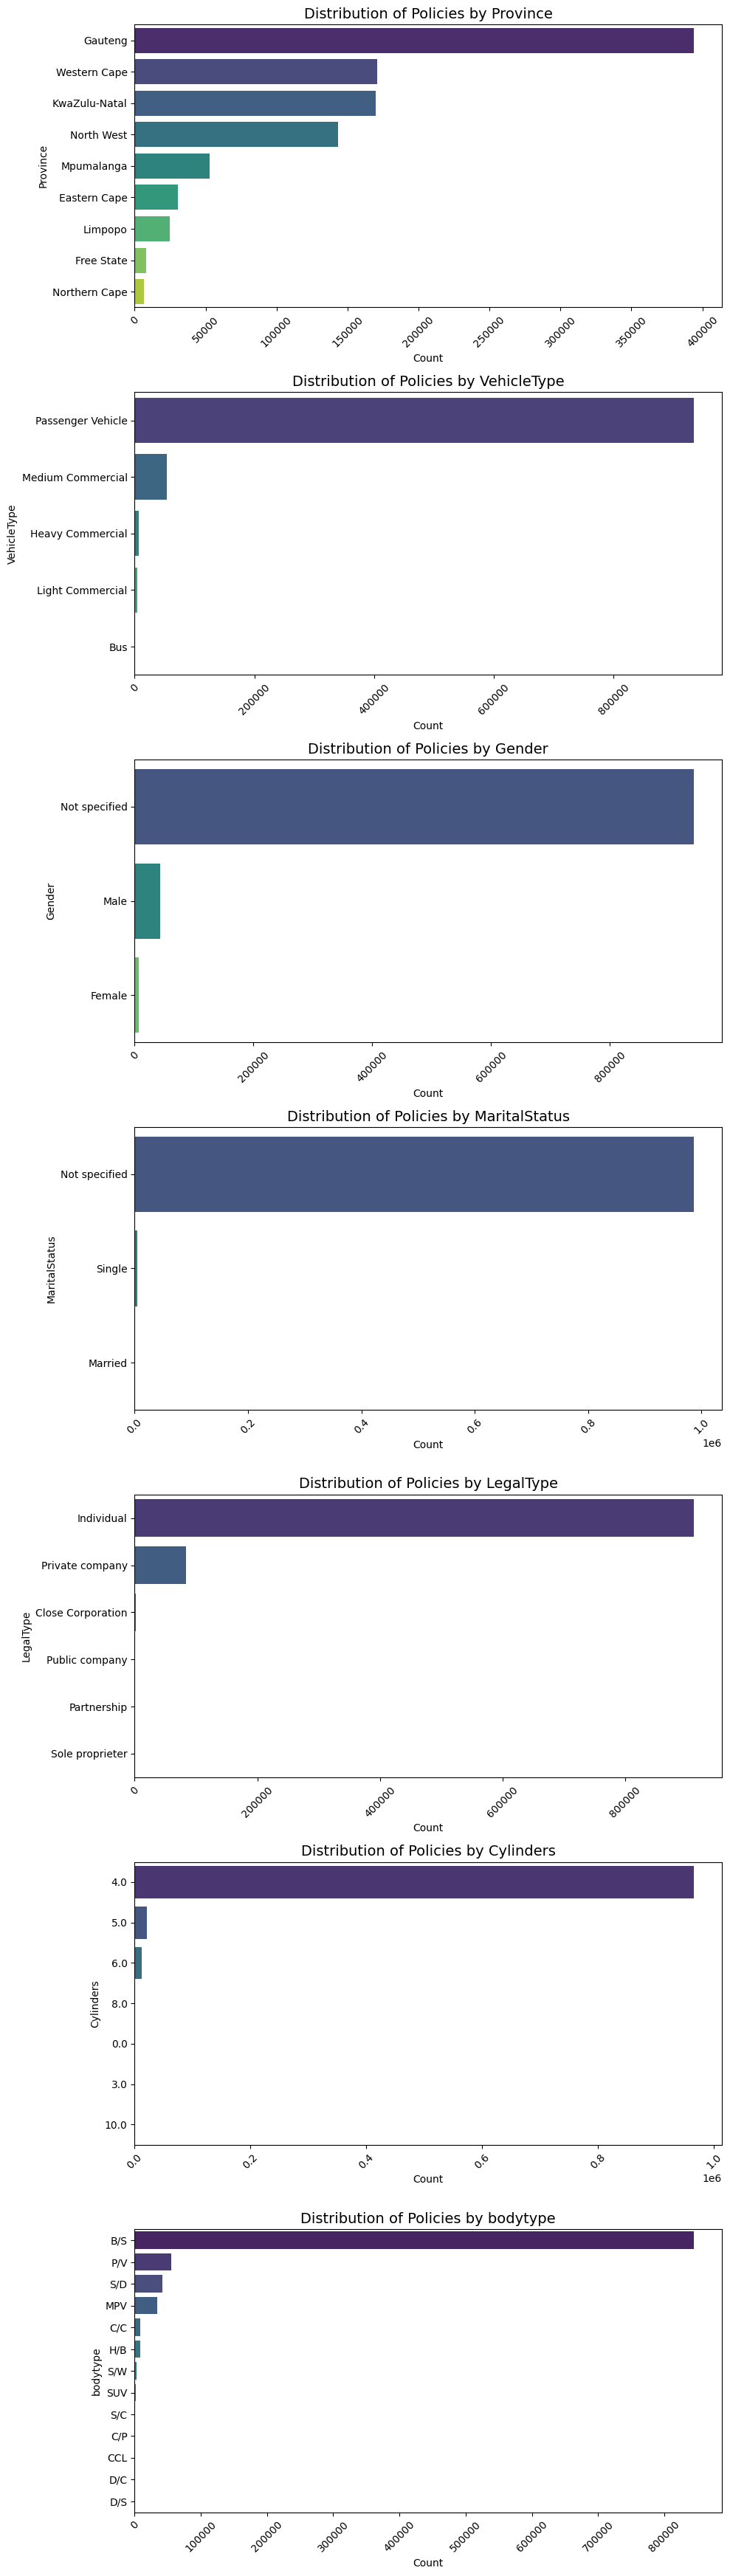

In [17]:
# Distribution of Categorical Variables
categorical_cols = ['Province', 'VehicleType', 'Gender', 'MaritalStatus', 'LegalType', 'Cylinders', 'bodytype']
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, 5 * len(categorical_cols)))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of Policies by {col}', fontsize=14)
    axes[i].set_xlabel('Count', fontsize=10)
    axes[i].set_ylabel(col, fontsize=10)
    axes[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

### Bivariate or Multivariate Analysis

In [18]:
# Calculate Loss Ratio (TotalClaims / TotalPremium)
# Handle potential division by zero for TotalPremium
df['LossRatio'] = df.apply(lambda row: row['TotalClaims'] / row['TotalPremium'] if row['TotalPremium'] != 0 else 0, axis=1)
# Replace infinite values (if any) with NaN and then fill NaN with 0 for policies with no premium or claims
df['LossRatio'] = df['LossRatio'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [19]:
# Calculate Claim Frequency (proportion of policies with at least one claim)
df['HasClaim'] = (df['TotalClaims'] > 0).astype(int)
total_policies = len(df)
claim_frequency_overall = df['HasClaim'].mean()
print(f"\nOverall Claim Frequency: {claim_frequency_overall:.4f}")


Overall Claim Frequency: 0.0028


In [20]:
# Calculate Claim Severity (average amount of a claim, given a claim occurred)
claim_severity_overall = df[df['HasClaim'] == 1]['TotalClaims'].mean()
print(f"Overall Claim Severity: {claim_severity_overall:.2f}")

print(f"Overall Portfolio Loss Ratio: {df['LossRatio'].mean():.4f}")

Overall Claim Severity: 23273.39
Overall Portfolio Loss Ratio: 0.2164


In [21]:
# How Loss Ratio varies by Province, VehicleType, and Gender
print("\n--- Loss Ratio by Province ---")
loss_ratio_province = df.groupby('Province')['LossRatio'].mean().sort_values(ascending=False)
print(loss_ratio_province.to_string())

print("\n--- Loss Ratio by VehicleType ---")
loss_ratio_vehicle_type = df.groupby('VehicleType')['LossRatio'].mean().sort_values(ascending=False)
print(loss_ratio_vehicle_type.to_string())

print("\n--- Loss Ratio by Gender ---")
loss_ratio_gender = df.groupby('Gender')['LossRatio'].mean().sort_values(ascending=False)
print(loss_ratio_gender.to_string())


--- Loss Ratio by Province ---
Province
Gauteng          0.262216
Limpopo          0.252857
Mpumalanga       0.235858
Western Cape     0.193640
North West       0.178830
KwaZulu-Natal    0.174868
Eastern Cape     0.152974
Northern Cape    0.116388
Free State       0.077792

--- Loss Ratio by VehicleType ---
VehicleType
Heavy Commercial     0.457233
Light Commercial     0.364845
Medium Commercial    0.305509
Passenger Vehicle    0.208682
Bus                  0.000000

--- Loss Ratio by Gender ---
Gender
Female           0.247919
Not specified    0.218548
Male             0.157443


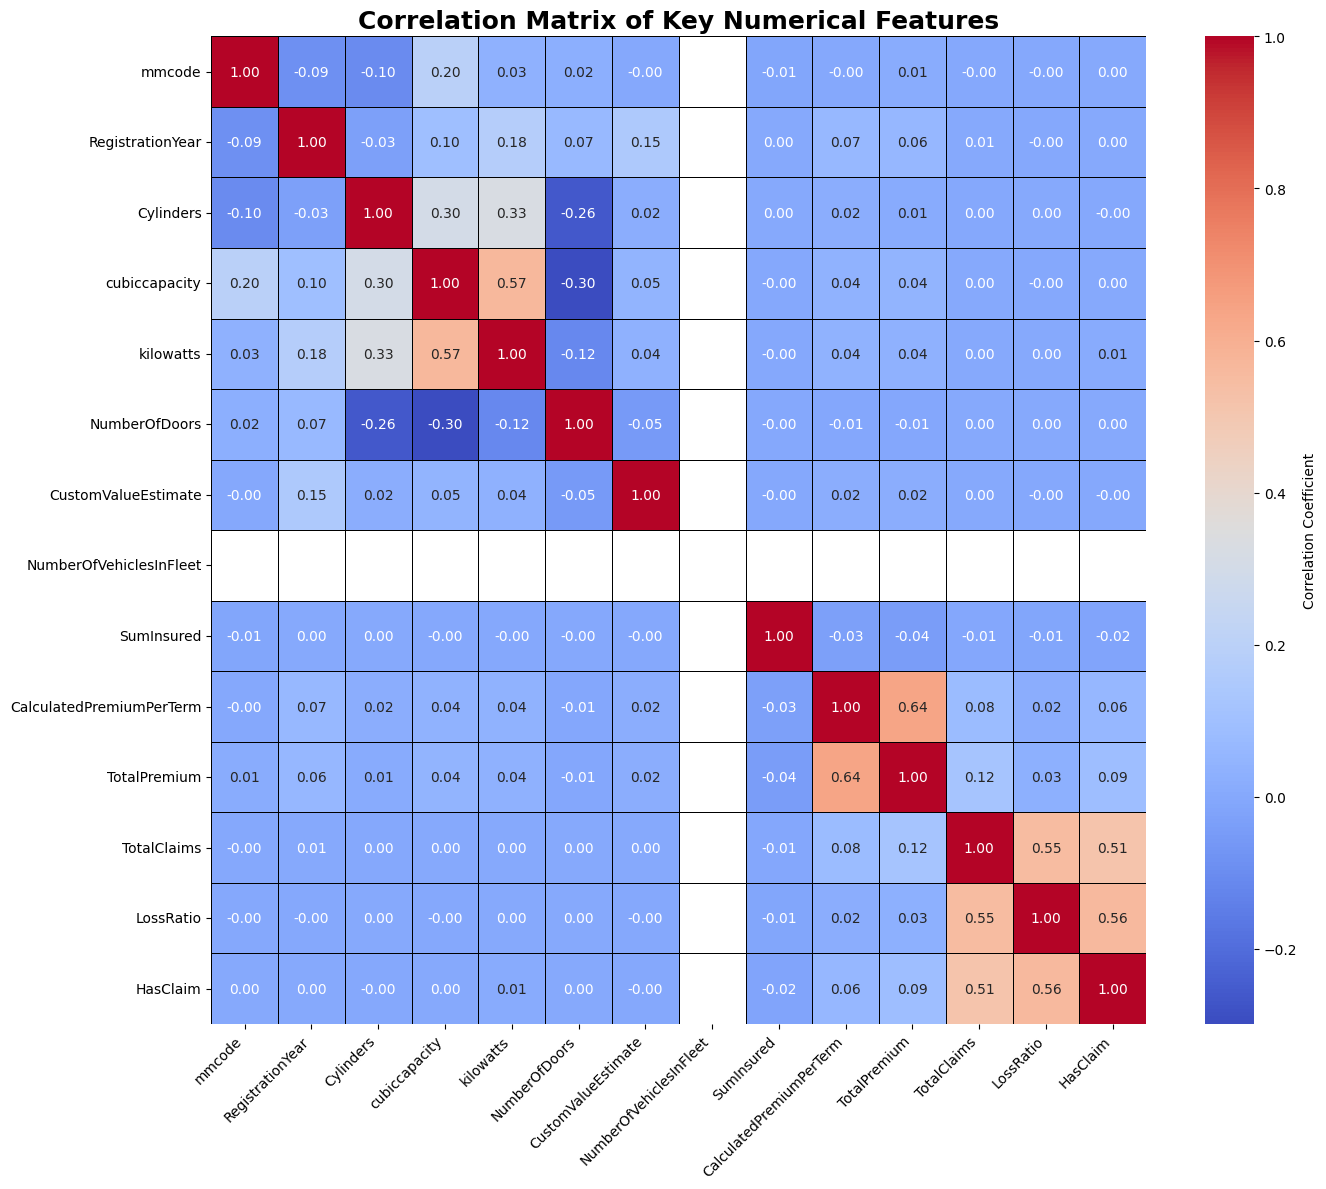

In [22]:
# Correlations for numerical features
numerical_cols_for_corr = df.select_dtypes(include=np.number).columns.tolist()
# Exclude ID columns if they were included by select_dtypes
id_cols = ['UnderwrittenCoverID', 'PolicyID', 'Mmcode', 'PostalCode']
numerical_cols_for_corr = [col for col in numerical_cols_for_corr if col not in id_cols]

if len(numerical_cols_for_corr) > 1:
    plt.figure(figsize=(14, 12))
    corr_matrix = df[numerical_cols_for_corr].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black', cbar_kws={'label': 'Correlation Coefficient'})
    plt.title('Correlation Matrix of Key Numerical Features', fontsize=18, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("\nNot enough relevant numerical columns for a correlation matrix plot.")



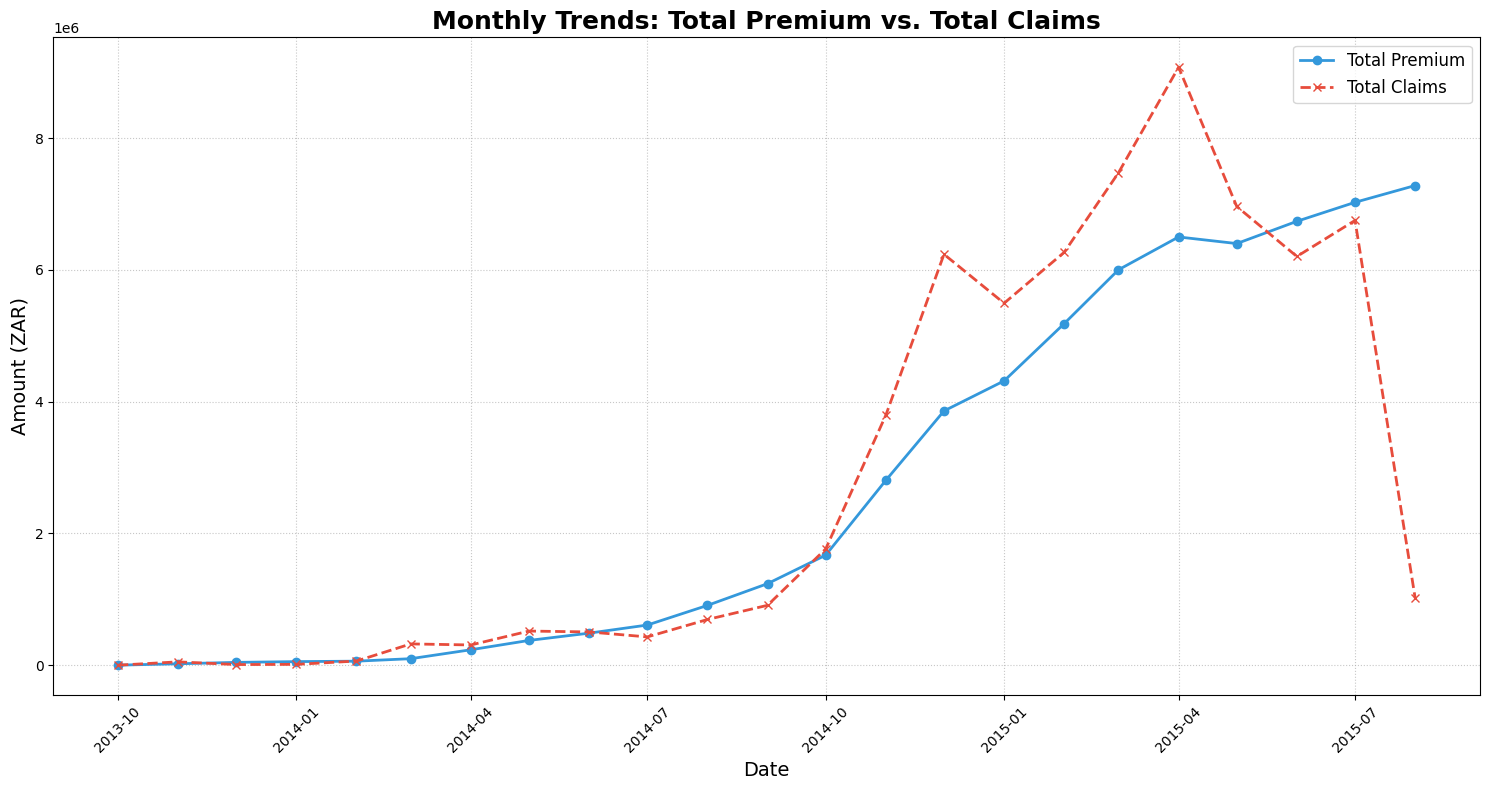

In [23]:
# Temporal Trends (Monthly changes TotalPremium and TotalClaims)
# Ensure 'TransactionDate' is correctly parsed as datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionMonth'], format='%Y-%m', errors='coerce')
monthly_trends = df.groupby('TransactionDate')[['TotalPremium', 'TotalClaims']].sum().reset_index()

plt.figure(figsize=(15, 8))
plt.plot(monthly_trends['TransactionDate'], monthly_trends['TotalPremium'], label='Total Premium', marker='o', linestyle='-', color='#3498db', linewidth=2)
plt.plot(monthly_trends['TransactionDate'], monthly_trends['TotalClaims'], label='Total Claims', marker='x', linestyle='--', color='#e74c3c', linewidth=2)
plt.title('Monthly Trends: Total Premium vs. Total Claims', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Amount (ZAR)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



--- Top 10 Vehicle Makes by Average Claim Amount ---
make
POLARSUN                               125197.843333
HYUNDAI                                 56663.492325
B.A.W                                   47856.245614
GOLDEN JOURNEY                          46169.723522
MERCEDES-BENZ                           34079.340852
IVECO                                   31495.539656
AUDI                                    30939.506443
VOLKSWAGEN                              30150.485741
CMC                                     30082.171180
FIAT                                    26721.907895

--- Top 10 Vehicle Models by Average Claim Amount ---
Model
L/CRUISER FJ 4.0 V6 CRUISER           192274.929825
INGWE 2.2                             125197.843333
SPRINTER 515 CDi F/C P/V              113304.605263
H-1 2.5 CRDI WAGON A/T                111190.888158
DUCATO 2.3 JTD VETRATO                100453.421053
CRAFTER 50 2.0 TDi HR 80KW F/C P/V     76660.915526
E 200 CGI BE ESTATE                   

<ipython-input-24-393578723>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_claims_by_make.values, y=avg_claims_by_make.index, palette='crest')


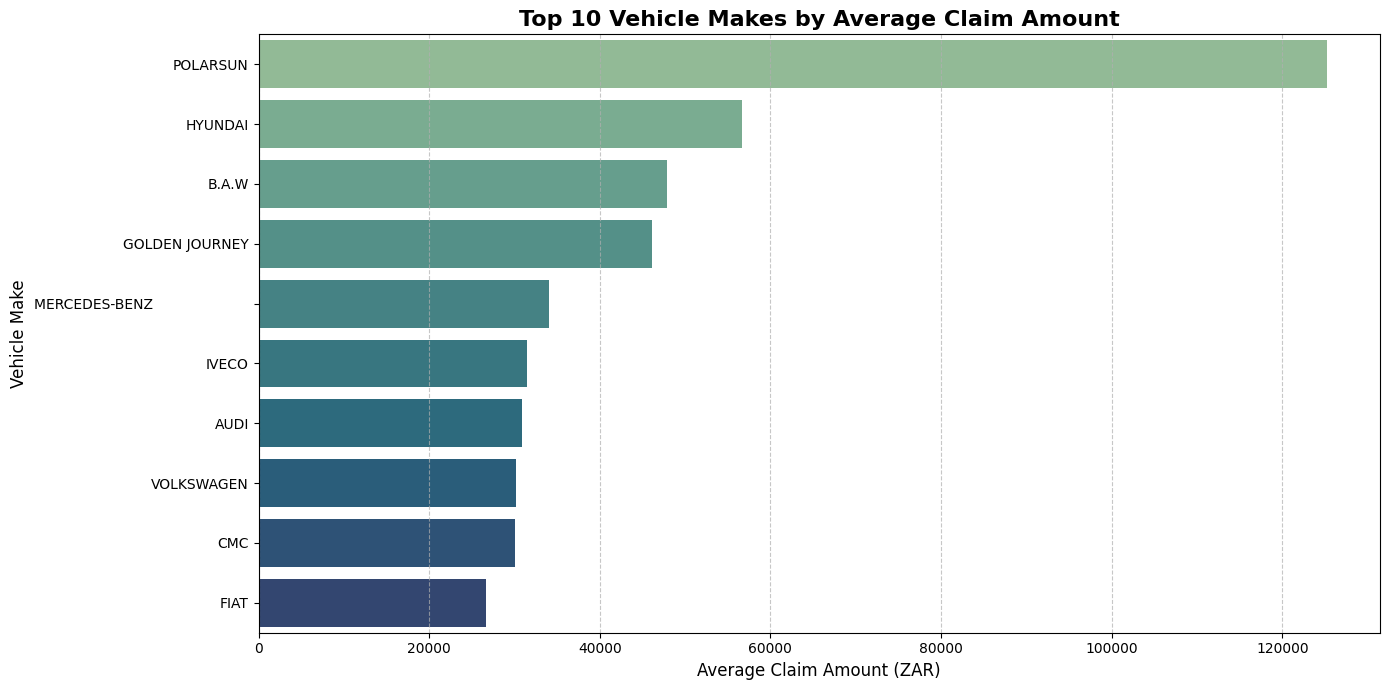

<ipython-input-24-393578723>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_claims_by_model.values, y=avg_claims_by_model.index, palette='flare')


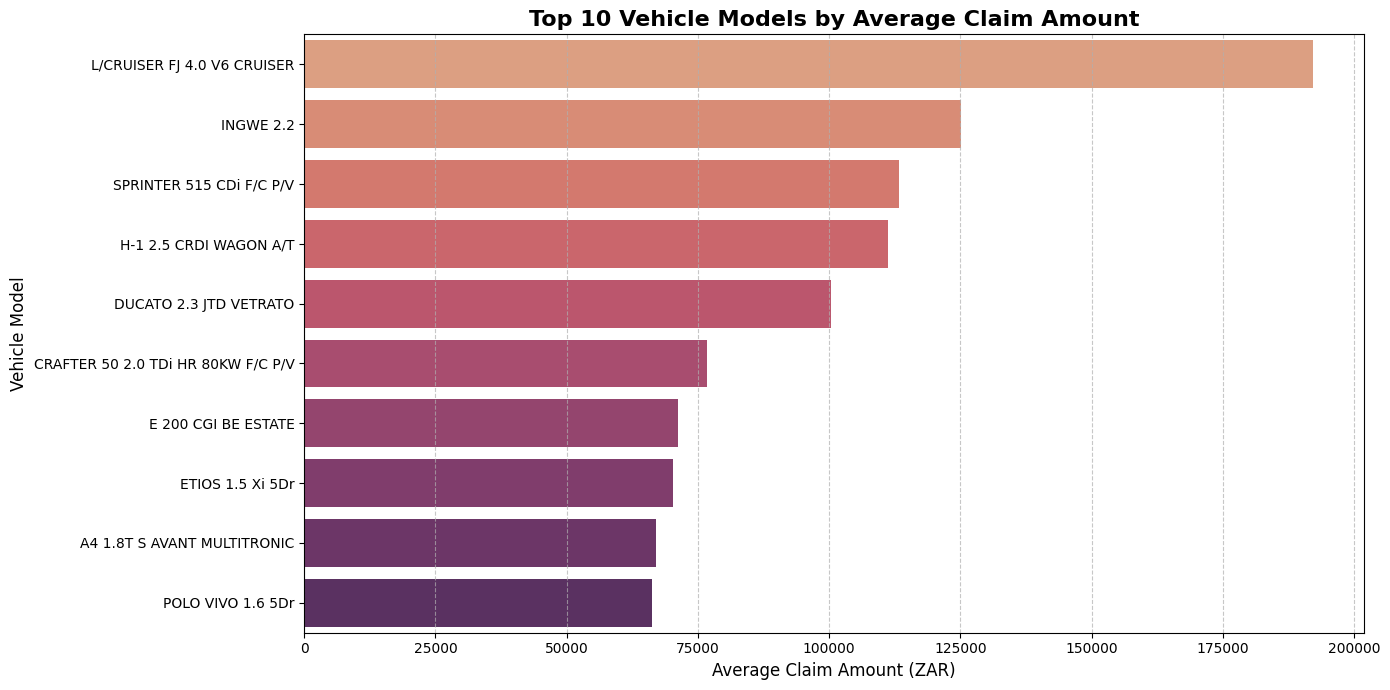

In [24]:
# Focusing on policies with claims > 0 for severity analysis
claims_only_df = df[df['TotalClaims'] > 0].copy()

if not claims_only_df.empty:
    avg_claims_by_make = claims_only_df.groupby('make')['TotalClaims'].mean().sort_values(ascending=False).head(10)
    avg_claims_by_model = claims_only_df.groupby('Model')['TotalClaims'].mean().sort_values(ascending=False).head(10)

    print("\n--- Top 10 Vehicle Makes by Average Claim Amount ---")
    print(avg_claims_by_make.to_string())

    print("\n--- Top 10 Vehicle Models by Average Claim Amount ---")
    print(avg_claims_by_model.to_string())

    plt.figure(figsize=(14, 7))
    sns.barplot(x=avg_claims_by_make.values, y=avg_claims_by_make.index, palette='crest')
    plt.title('Top 10 Vehicle Makes by Average Claim Amount', fontsize=16, fontweight='bold')
    plt.xlabel('Average Claim Amount (ZAR)', fontsize=12)
    plt.ylabel('Vehicle Make', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 7))
    sns.barplot(x=avg_claims_by_model.values, y=avg_claims_by_model.index, palette='flare')
    plt.title('Top 10 Vehicle Models by Average Claim Amount', fontsize=16, fontweight='bold')
    plt.xlabel('Average Claim Amount (ZAR)', fontsize=12)
    plt.ylabel('Vehicle Model', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo claims data available to analyze average claims by vehicle make/model.")


 ### Outlier Detection

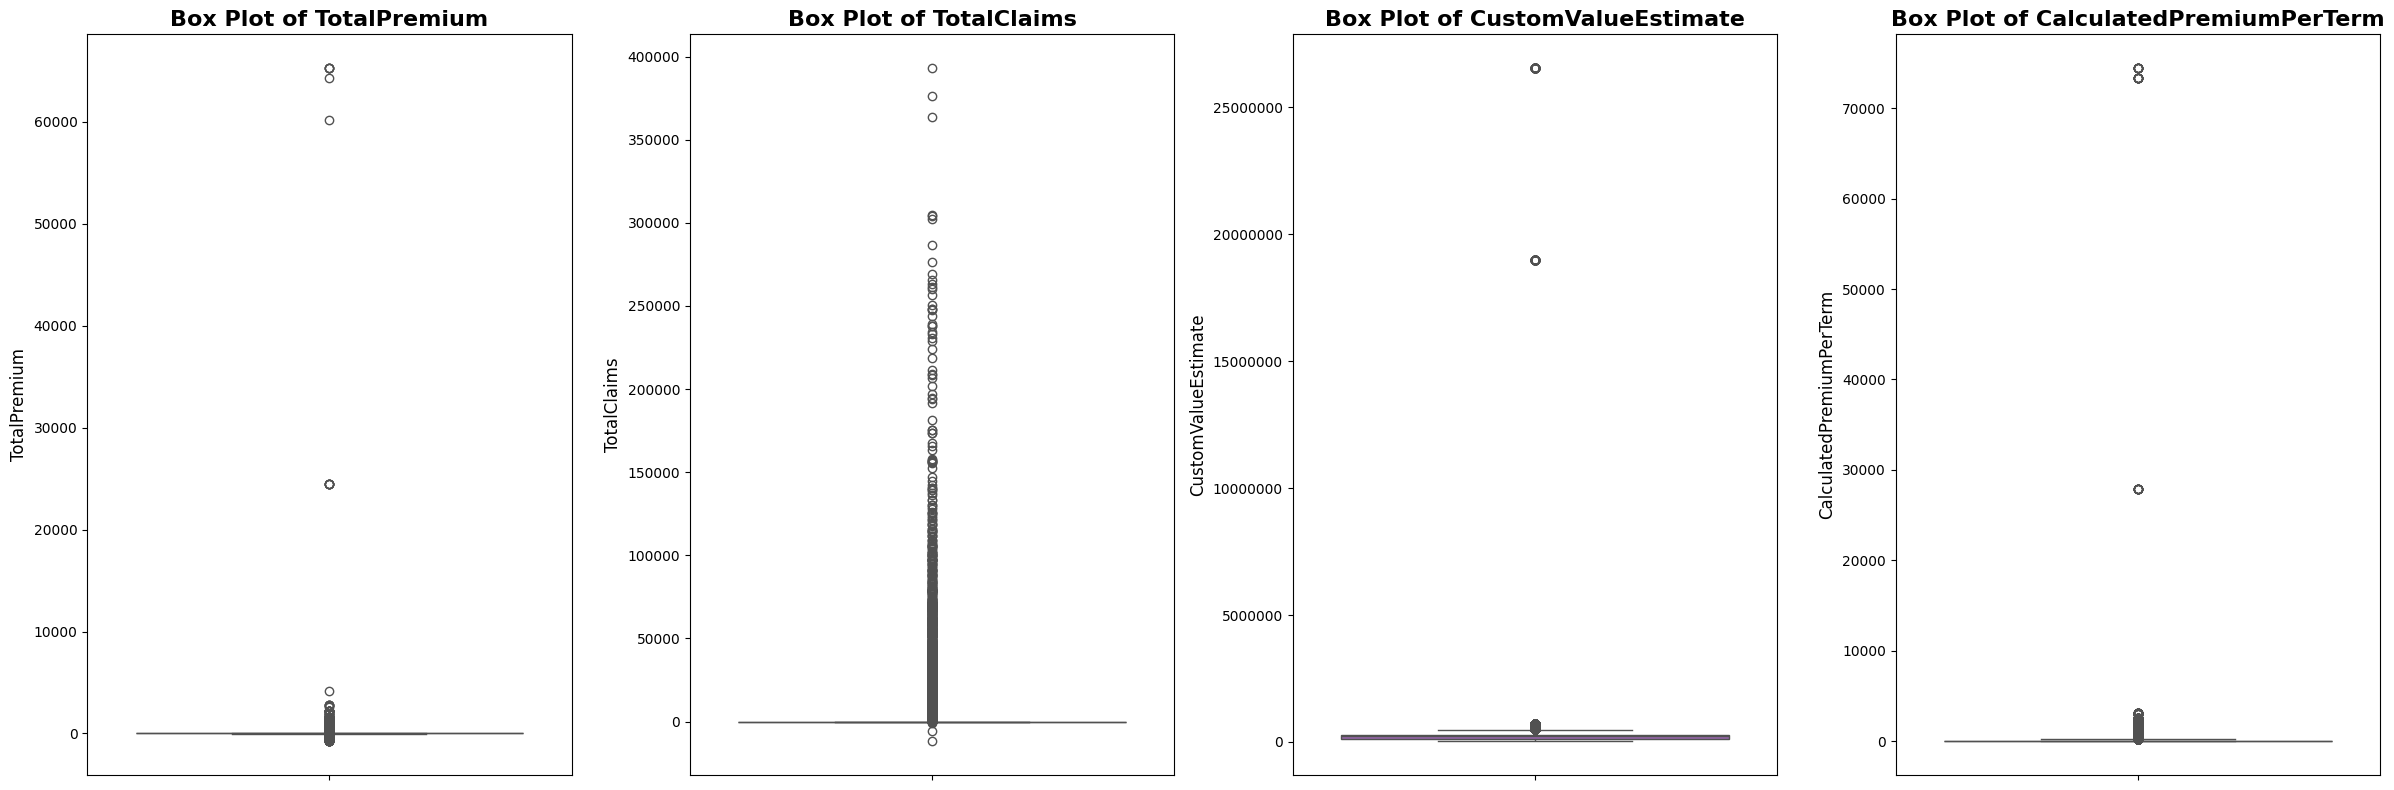

In [25]:
# Box plots for key financial variables using the full dataset
financial_vars = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'CalculatedPremiumPerTerm']
fig, axes = plt.subplots(1, len(financial_vars), figsize=(6 * len(financial_vars), 8))
axes = axes.flatten()

for i, col in enumerate(financial_vars):
    sns.boxplot(y=df[col], ax=axes[i], color='#9b59b6')
    axes[i].set_title(f'Box Plot of {col}', fontsize=16, fontweight='bold')
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].ticklabel_format(style='plain', axis='y') # Prevent scientific notation on y-axis
plt.tight_layout()
plt.show()

### Final Plots Capturing Key Insights

<ipython-input-26-3194565629>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loss_ratio_province.values, y=loss_ratio_province.index, palette='viridis', edgecolor='black')


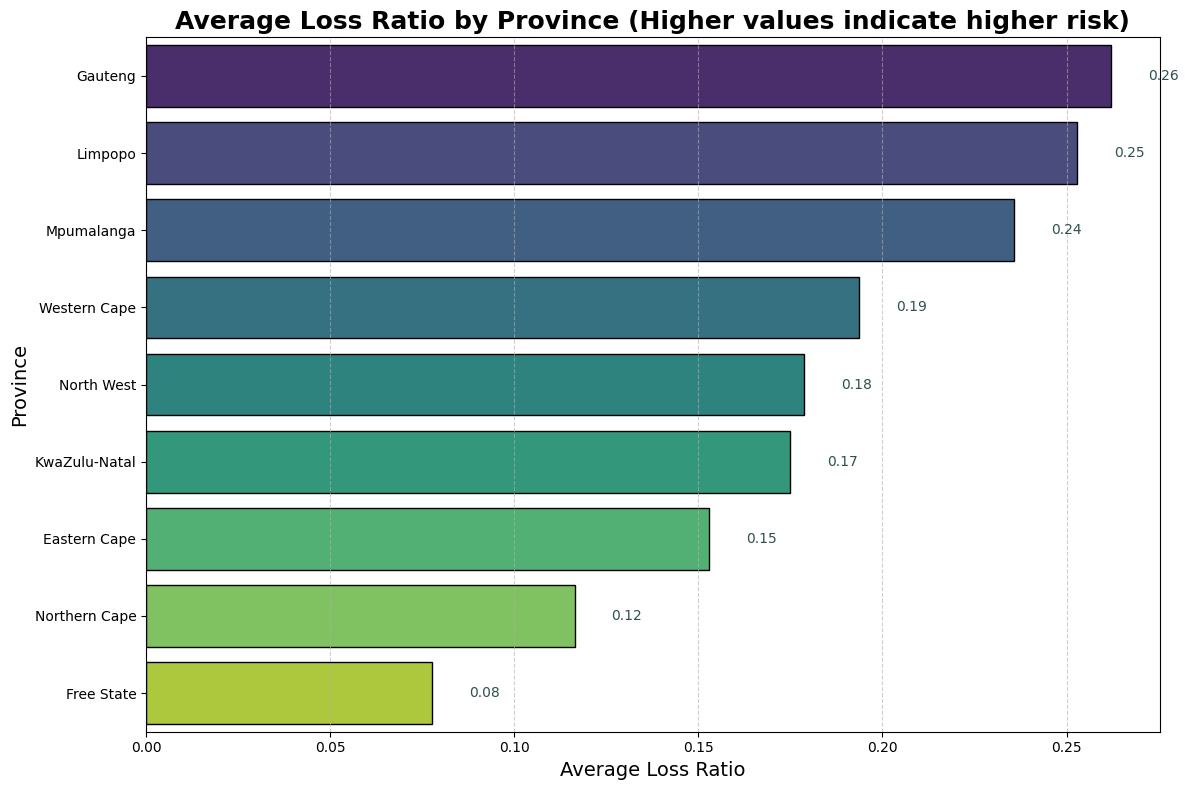

Insight 1: This plot clearly shows the variation in average loss ratios across different provinces. Provinces with higher loss ratios (e.g., Gauteng in dummy data) present higher risk, suggesting a need for differentiated premium strategies or risk mitigation efforts in those areas.


In [26]:
# Plot 1: Loss Ratio by Province - Enhanced Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=loss_ratio_province.values, y=loss_ratio_province.index, palette='viridis', edgecolor='black')
plt.title('Average Loss Ratio by Province (Higher values indicate higher risk)', fontsize=18, fontweight='bold')
plt.xlabel('Average Loss Ratio', fontsize=14)
plt.ylabel('Province', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
# Add value labels
for index, value in enumerate(loss_ratio_province.values):
    plt.text(value + 0.01, index, f'{value:.2f}', va='center', fontsize=10, color='darkslategray')
plt.tight_layout()
plt.show()
print("Insight 1: This plot clearly shows the variation in average loss ratios across different provinces. Provinces with higher loss ratios (e.g., Gauteng in dummy data) present higher risk, suggesting a need for differentiated premium strategies or risk mitigation efforts in those areas.")



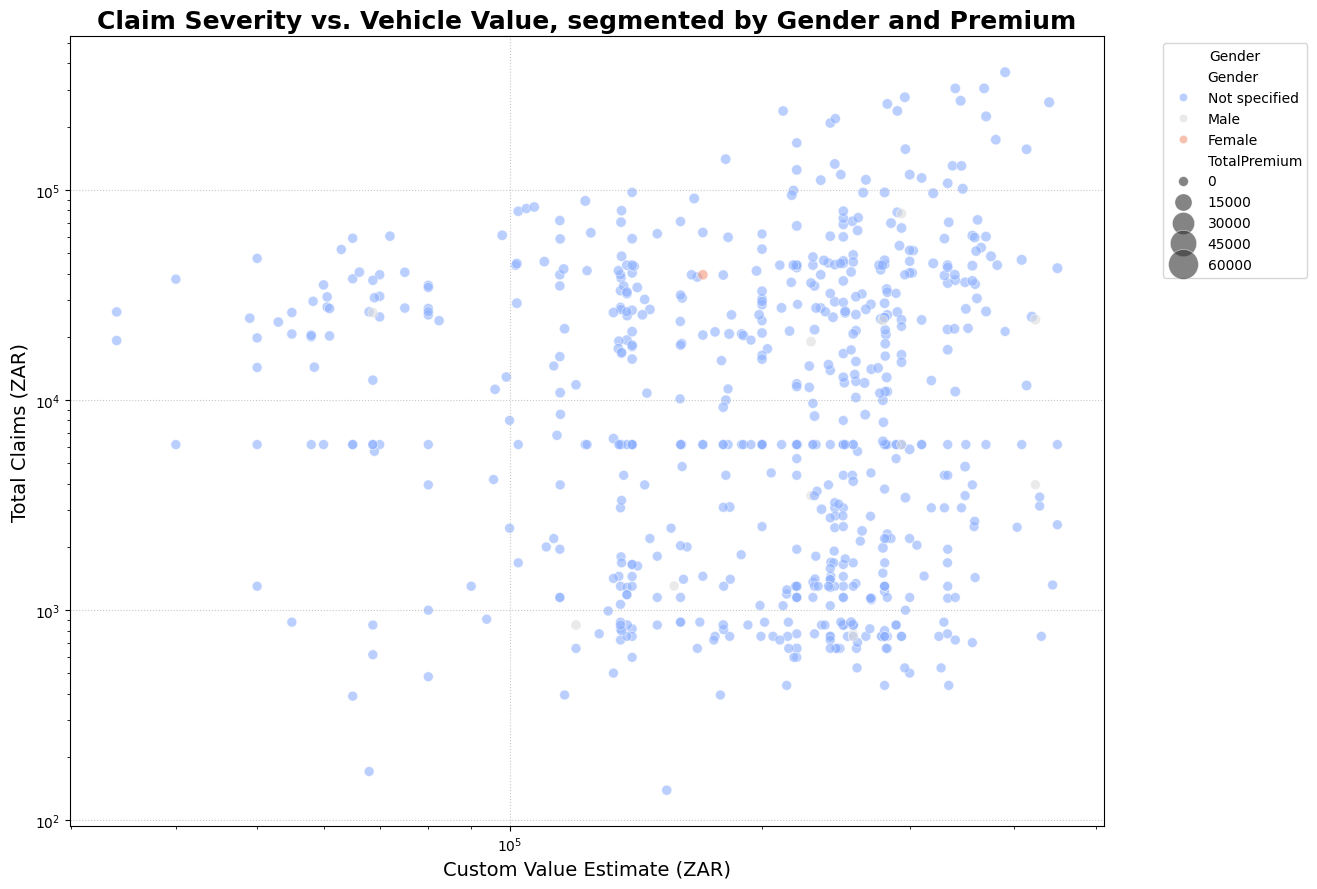

Insight 2: This visualization helps assess if high-value vehicles correlate with high claims, and if there are noticeable differences in claim patterns between genders for different premium levels. The size of the marker indicates the Total Premium, adding another layer of information.


In [27]:
# Plot 2: Scatter plot of CustomValueEstimate vs. TotalClaims with hue by Gender
# Focusing on policies with claims > 0
plt.figure(figsize=(14, 9))
sns.scatterplot(x='CustomValueEstimate', y='TotalClaims', hue='Gender', size='TotalPremium', sizes=(50, 500),
                data=claims_only_df, alpha=0.6, palette='coolwarm', edgecolor='white', linewidth=0.5)
plt.title('Claim Severity vs. Vehicle Value, segmented by Gender and Premium', fontsize=18, fontweight='bold')
plt.xlabel('Custom Value Estimate (ZAR)', fontsize=14)
plt.ylabel('Total Claims (ZAR)', fontsize=14)
plt.xscale('log') # Log scale helps visualize spread if data is skewed
plt.yscale('log') # Log scale helps visualize spread if data is skewed
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.95, 1]) # Adjust layout to make space for legend
plt.show()
print("Insight 2: This visualization helps assess if high-value vehicles correlate with high claims, and if there are noticeable differences in claim patterns between genders for different premium levels. The size of the marker indicates the Total Premium, adding another layer of information.")


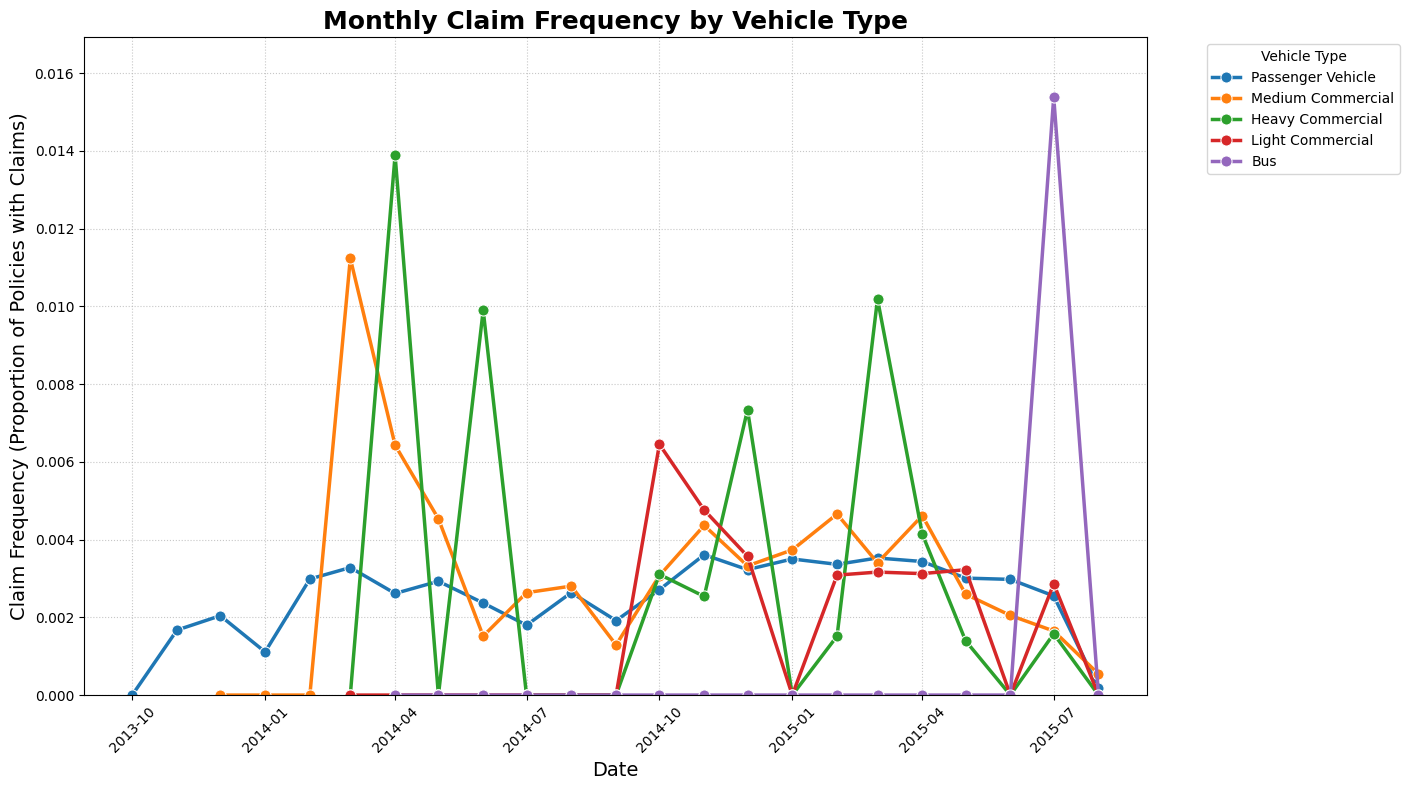

Insight 3: This plot illustrates temporal trends in claim frequency for different vehicle types. It can reveal if certain vehicle types are experiencing increasing or decreasing risk over time, which is crucial for dynamic pricing and risk assessment.


In [28]:
# Plot 3: Trends in Claim Frequency by Vehicle Type over Transaction Month
# Calculate monthly claim frequency per vehicle type
monthly_claim_freq_veh = df.groupby(['TransactionDate', 'VehicleType'])['HasClaim'].mean().reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(x='TransactionDate', y='HasClaim', hue='VehicleType', data=monthly_claim_freq_veh,
             marker='o', markersize=8, linewidth=2.5, palette='tab10')
plt.title('Monthly Claim Frequency by Vehicle Type', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Claim Frequency (Proportion of Policies with Claims)', fontsize=14)
plt.ylim(0, monthly_claim_freq_veh['HasClaim'].max() * 1.1) # Set y-limit slightly above max
plt.grid(True, linestyle=':', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()
print("Insight 3: This plot illustrates temporal trends in claim frequency for different vehicle types. It can reveal if certain vehicle types are experiencing increasing or decreasing risk over time, which is crucial for dynamic pricing and risk assessment.")
